### Building an Tic Tac Toe Agent

In this notebook, we define some terms with regards to RL and use the example of Tic-Tac-Toe as an example on how to implement RL. This note book is to help understand the problem more intuitively. For the source of most information please see ["Reinforcement Learning in Python"](https://www.udemy.com/course/artificial-intelligence-reinforcement-learning-in-python/learn/lecture/13456974#questions).

#### Intro

- Consider a Simple game of Tic-Tac-Toe. 
- What are the number of states?
    - [If we simplify the problem so that we can keep adding x's and 0's even after a player gets 3 in a row]

<span style='color:blue'>  Remembering that we have a 3 by 3 board and since we are not considering whether there is a winner or a looser, i.e 3 in a row this problem is very simple. Each location on the board has 3 possible states, empty, X or O. There are 9 possible locations on the board so the total number of states is three to the power nine ($3^{9} states).$</span>

- Each location has 3 possible states , Empty, X or O
- 9 locations on the board
- $\#$ states $= 3 \times 3\times \dots \times 3 = 3^{9} $


#### 3 Important terms to be discussed later

- Agent: Thing that senses the enviroment, thing we are trying to code intelligence and learning into.

- Enviroment: Real World or simulated world that the agent lives in.

- State: Different configurations of the enviroment that the agent can sense.

#### Other Important things that have to be defined in RL in order to understand the concept.

- Another concept: **Rewards**
- This is what differentiates RL from other types of ML
- An Agent not only tries to maximize its immediate reward, but future rewards as well.
- Often RL algorithms will find novel ways of accomplishing this

<span style='color:blue'> An common example in RL litrature is the Alpha Go game. This is some thing that is not intuitive to humans but a reinforcement learning can figure it out.</span>

- AlphaGo: learned unique/unpredictable strategies that led to beating a world champion.
- Not intuitive to humans, but RL can figure it out.

#### Caveat

- Possible danger of RL: unintended consequences

<span style='color:blue'> Imagine you programmed an AI  to minimize human death and it decideds that since human numbers grow exponentially and more people are going to die in the future its best to destroy everyone now in order to minimize dying in the future. This example illustrates that there are some danger of unintended and dangerous side affects of RL algorithms interacting with the real world.</span>

- Commonly repeated idea: AL could wipe out humanity if it decides that's the best thing for us
- Example: Minimize human deaths
- AI decides that since number humans grows exponentially, that more people will die in the future, then best to destroy everyone now in order to minimize dying in the future.

<span style='color:blue'> A more low level of (uninteded consequences) why and how intelligent agents should be programmed intelligently. Think of a robot trying to solve a maze. A reasonable goal might be to simply solve the maze (Reward = 1 if solved, otherwised reward = 0 if not solved).</span>

- Lower level example: Robot trying to solve a maze
- Reasonable goal: solve the maze
- Reward = 1 if solved, reward = 0 if not solved
- Possible solution: move randomly until the maze is solved

<span style='color:blue'> With this reward structure its possible for an agent to just implement a random strategy and eventually solve a maze. Since we never told the robot to solve the robot that it should solve the maze efficiently thus making random movements until the maze is solved still solves the maze. (i.e. reward function has not been clearly defined). </span>

- Is that a good strategy? No! 
- We never told the algorithm that it needs to solve the maze efficiently (we always get the reward in the end).

<span style='color:blue'> Now imagine we give a reward of -1 for every step the robot takes in the maze. Now the robot has insentive to solve the maze using the least number of steps. So, it will tend to find the reward more efficiently this way. This will demonstrated in code later. Notice how a negative reward is like a penalty, which it is. Reward is just a term that we use. It tells you how good or bad you are doing. </span>

- Now: Reward of -1 for every step taken
- In order to maximize total reward, must minimize the $\#$ steps taken
- Note: Reward is always a real number.

#### Terms

- So far defined: Agent, enviroment, state and reward
- Next: **Actions**

**Actions** are what an agent **does** in its enviroment.

- Ex. agent = a 2-D game character. Actions = {up,down,left,right,jump}

We look at finite sets of actions only. 

#### SAR triples

- We often think about (state, action, reward) as a triple
- Notation $(s, a, r)$

<span style='color:blue'> You are in a state, you take an action then you get a reward. </span>

#### Timing 

- Timing is important in RL
- Every game is a sequence of states, actions and rewards
- Convention: Start in state $S(t)$, take action $A(t)$, receive reward of $R(t+1)$
- Reward always results from $(s,a)$ you took at a previous time
- $S(t)$, $A(t)$ also brings you a new state, $S(t+1)$
- This also makes another important triple:
- $[S(t), A(t), S(t+1)]$
- Also denotated as:
- $(s,a,s^{'})$

<span style='color:blue'> In reinforcement learning timing is an important concept as well. This is since every time you play a game, you get a sequence of states actions and rewards. Within this framework you start in a state, $s_t$ , you take an action $a_t$ but you receive a reward of $r_{t+1}$. So the reward you get always results in action you took in the previous step. This action also results in you being in a new state $S_{t+1}$</span> 

####  Summary 

- Program the agent to be intelligent
- Agent interacts with its enviroment by being in state, taking action based on that state, which brings it to a new state
- Enviroment gives the agent a reward, can be positive or negative (but must be a number).
- Reward is received in next state
---

#### Reinforcement Learning Framework [Components of a RL system](https://www.udemy.com/course/artificial-intelligence-reinforcement-learning-in-python/learn/lecture/6387228#questions)

See [Sutton & Barto](http://incompleteideas.net/book/bookdraft2017nov5.pdf) chapter 3 for more.

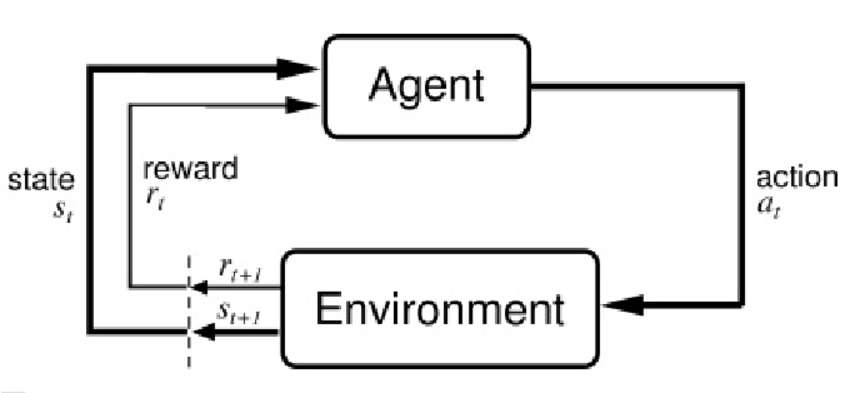

Note:
    
- **Agent** : thing thats playing the game. This is what you'll program an RL algorithm into.

- **Enviroment** : The Enviroment is the thing that the agent interacts with. Its the agents world.

- **State**  : The specific configuration of the enviroment that the Agent is sensing.

#### States:

- Note that the state involves only what the agent can sense, not everything that is about the enviroment.
    - E.g. A robot that vacummes in Australia won't be affected by everything that happens in India.

#### Actions and Rewards
- **Actions**: Actions are the things that an agent can do that will affect its state. 
    - In Tic Tac Toe that is moving a piece on the board
- Performing an action always brings us to the next state, which also comes with a possible reward.

#### Rewards
- Rewards tell you "how good" your action was not whether or not it was an incorrect action or a correct action.
- It does not tell you wether it was your best or your worst action. It's just a number.
- Rewards that you have gotten over your existence does not necessarily represent rewards that you could get in the future.
    - E.g. You could be searching the bad part of a set space and hit a local maximum of 10 pts but the global maximum is 1000 pts, but you would not know that (as the agent). The agent does not know that, but we know that because we designed the game (instance of "God mode" knowledge).
    
    
- Much like life as a human/animal being. You are born into a specific enviroment and you go about your daily life. But what if another person is born in a world without modern medicine. You quickly realize that the local maximum is nowhere near the global maximum. So everything is relative.
- Rewards are only meaningful relative to each other.
    - Rewards are meaningless numbers that only make sence relative to each other. (In terms of reinficement learning, more reward is always better than less reward).

**Notation**:

$$S(t), A(t) \rightarrow R(t+1), S(t+1)$$

Sometimes representes as the 4-tuple:

$$(s,a,r,s^{'})$$

Oddly, the "prime" symbol does not strictly mean "at time t + 1".

Instead:

- $s^{'} = $ state we go to when doing "a" from state "s".

-  $r = $ reward we get when we do "a" while in state "s".

We know that being in state $S(t)$ and taking action $A(t)$ will lead us to the reward $R(t+1)$ and a state $S(t+1)$. When we drop this time index $t$ then we can represent this 4-tuple as $(s,a,r,s^{'})$. Here, we do not prime the r as you expect. This is odd but that is the standard notation. So the prime does not mean at time $t+1$.

#### New terms

##### Episode

**Episode**: An episode represents one run of the the game.

Example:

- Start a tic tac toe game with an empty board.
- As soon as the player gets 3 piecies in a row, that's the end of the episode.

- Our RL agent will learn across **many episodes**

- Example: After playing a large number of games we can have possibly trained an intellgent agent.

- $\#$ episodes we use to train is a [**hyperparameter**](https://towardsdatascience.com/understanding-hyperparameters-and-its-optimisation-techniques-f0debba07568).
    - How long it will take to train an intelligent game is a hyperparameter and that depends on the game being played, the number of states, how random the game is and so on.

- **Episodic task**: We call playing the game of tic-tactoe an **episodic task** because you play it again and again. (repetitive)
- **Continuous task**: An episodic task is different to a **continuous task** which never ends.
- We won't look at continuous tasks here. 

<span style='color:green'> Since mathamatically, we represent the RL problems as a Markov Decision process, it is both possible to have discrete time and continuous time problems. For the sake of our project we look at discrete time, discrete space problems only as they are more simple. </span>


<span style='color:blue'>
Note: In machine learning, a hyperparameter is a parameter whose value is set before the learning process begins. By contrast, the values of other parameters are derived via training.
</span>

---

- When is the "end" of an episode?
- Certain states in the state space tell us when the episode is over.
- These are states from which no more action can be taken.
- They are called **Terminal states**
- For Tic Tac Toe:
    - One player gets 3 in a row
    - Board is full (draw)

A **terminal state** is a state in which you can take no more action. This means that the episode is over.

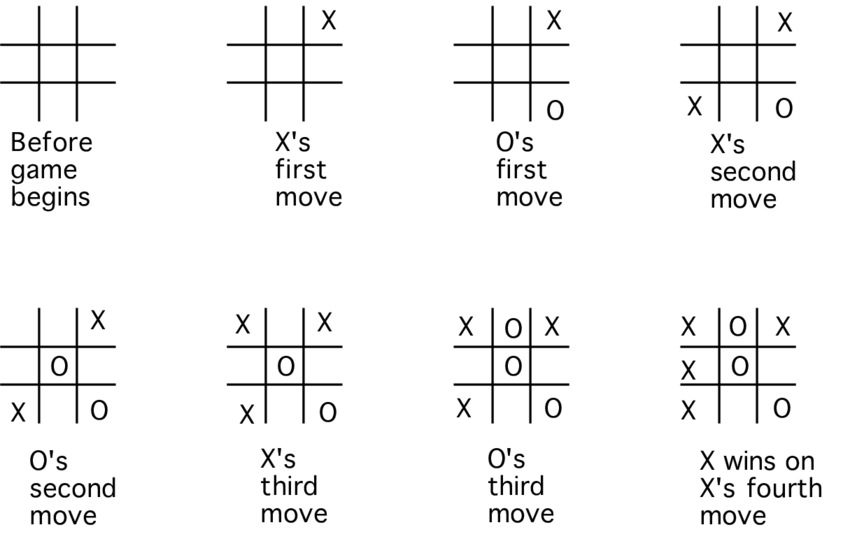

<span style='color:blue'> When we are talking about the end of a game or an episode. There are certain state spaces that tell you that the episode is over(end of the game is upon us). In the case of Tic-Tac-Toe, this is when one of the two players has three of their pieces in a row or similarly when the board is full(no player wins). These states are called **terminal states**. </span>


<span style='color:blue'> 
So a terminal state is a state from which you can take no more actions. It means that the episode is over.
</span>



#### Summary

- Reviewed: Agent, Enviroment,
- State, Action and Reward
- Learned about:
    - Episodes
    - Terminal states
- Next: Reward assignment subtleties, how to do the actual "learning".

<span style='color:blue'> 
Above we learned about episodes and how an RL algorithm will learn across many episodes. We also learned that the terminal state reprisents the end of an episode. Next, we look at some subtleties with regards to reward assignment and how to do the actual learning.
</span>
---



### Notes on Reward Assignment:

- Tell the agent **what** you want it to achieve, not **how** you want it to be achieved.
- Be careful of not building in prior knowledge into your RL algorithm.

### The Value Function and RL algorithm

##### Planning
- We don't just think about immediate rewards, but future rewards too. We want to assign some value to the current state that reflects the future too. This is called the **Value function**.

<span style='color:blue'> 
Imagine the scenario. You where thinking about studying for an exam tomorrow but would rather hangout with friends. Hanging out with friends has the reward of a dopamine hit whilst studying makes you bored and tired (dopamine decrease, negative reward). Why study?
</span>

<span style='color:blue'> 
We don't just think about immediate rewards, we design a plan of action based on future. Perhaps you believe, going to study leads to good grades, and good grades means finding a job that pays well.
</span>

<span style='color:blue'> 
So we want to assign some value for being in the state, "You staying at home and studying for your exam". We call this the value function and this is what we will discuss.
</span>




##### Sutton and Barto (pg. 5) 4 main subsections beyond the agent and the enviroment

Below we look at [Sutton and Barto (pg. 5)](http://incompleteideas.net/book/bookdraft2017nov5.pdf) for the 4 main subsections beyond the agent and the enviroment (the next points are directly from Sutton and Barto). Sutton and Barto define the subelements of the reinforcement learning system as: a policy, a reward signal, a value function, and, optionally, a model of the environment.

1) A **policy** defines the learning agent's way of behaving at a given time.

- Roughly speaking, a policy is a mapping from perceived states of the environment to actions to be taken when in those states.
- A policy corresponds to what in psychology would be called a set of stimulus–response rules or associations.
- In some cases the policy may be a simple function or lookup table, whereas in others it may involve extensive computation such as a search process.
- The policy is the core of a reinforcement learning agent in the sense that it alone is sufficient to determine behavior. 
- In general, policies may be stochastic.


2) A **reward signal** defines the goal in a RL problem.

- On each time step, the environment sends to the reinforcement learning agent a single number called the reward. 
- The agent’s soleobjective is to maximize the total reward it receives over the long run. 
- The reward signal thus defines what are the good and bad events for the agent. 
- In a biological system, we might think of rewards as analogous to the experiences of pleasure or pain. 
- They are the immediate and defining features of the problem faced by the agent. 
- The reward signal is the primary basis for altering the policy; if an action selected by the policy is followed by low reward, then the policy may be changed to select some other action in that situation in the future. 
- In general, reward signals may be stochastic functions of the state of the environment and the actions taken.


3) A **value function** specifies what is good in the long run

- Whereas the reward signal indicates what is good in an immediate sense, a value function specifies what is good in the long run. 
- Roughly speaking, the value of a state is the total amount of reward an agent can expect to accumulate over the future, starting from that state.
- Whereas rewards determine the immediate, intrinsic desirability of environmental states, values indicate the long-term desirability of states after taking into account the states that are likely to follow, and the rewards available in those states. 
- For example, a state might always yield a low immediate reward but still have a high value because it is regularly followed by other states that yield high rewards. 
- Or the reverse could be true.
- To make a human analogy, rewards are somewhat like pleasure (if high) and pain (if low), whereas values correspond to a more refined and farsighted judgment of how pleased or displeased we are that our environment is in a particular state. Expressed this way, we hope it is clear that value functions formalize a basic and familiar idea.


"
Rewards are in a sense primary, whereas values, as predictions of rewards, are secondary. Without
rewards there could be no values, and the only purpose of estimating values is to achieve more reward.
Nevertheless, it is values with which we are most concerned when making and evaluating decisions.
Action choices are made based on value judgments. We seek actions that bring about states of highest
value, not highest reward, because these actions obtain the greatest amount of reward for us over the
long run. Unfortunately, it is much harder to determine values than it is to determine rewards. Rewards
are basically given directly by the environment, but values must be estimated and re-estimated from the
sequences of observations an agent makes over its entire lifetime. In fact, the most important component
of almost all reinforcement learning algorithms we consider is a method for efficiently estimating values.
The central role of value estimation is arguably the most important thing we have learned about
reinforcement learning over the last few decades.
"

4) A **model of the reinforcement learning system** is something that mimics the behaviour of the enviroment, or more generally that allows inferences to be made about how the enviroment will behave.

- For example, given a state and action, the model might predict the resultant next state and next reward. 
- Models are used for planning, by which we mean any way of deciding on a course of action by considering possible future situations before they are actually experienced. 
- Methods for solving reinforcement learning problems that use models and planning are called model-based methods, as opposed to simpler model-free methods that are explicitly trial-and error learners—viewed as almost the opposite of planning.

Note: In Chapter 8 [Sutton and Barto (pg. 5)] explore RL systems that simultaneously learn by trial and error, learn a model of the environment, and
use the model for planning. Modern reinforcement learning spans the spectrum from low-level, trialand-error learning to high-level, deliberative planning.


---
#### Credit Assignment Problem

- You receive a reward- getting hired for your dream job
- What are previous actions that led to this success?
- Called the "Credit assignment problem"
- Ask the question: "What did I do in the past that led to the reward I'm receiving now?"
- What actions get the credit?

<span style='color:blue'> 
What state of being in your past led to you to get your dream job today. The credit assignment problem is the question. What did you do in you past that led you to getting your current reward.
</span>
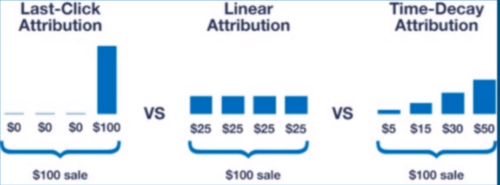
##### Attribution
<span style='color:blue'> 
The credit assignment problem shows up in Advertising too however in a different form. In online advertising it is refered to as attribution. The idea is that if a user has seen your AD and eventually converts . 
</span>

<span style='color:blue'> 
However at least 10 different networks have shown your ad. Who takes the credit for the conversion.  There are various schemes for distribiuting the credit, like assigning the credit linearly. However it could be a much deeper problem. Maybe it was the act of showing the user the advert ten times that led to him eventually buying the product. In that sence all the ads deserve to get the same ammount of credit (linear attribution).
</span>

<span style='color:blue'> 
Perhaps the user did not see the AD the first 9 times but only saw it the 10$_{th}$ time(Last-Click Attribution).
</span>

<span style='color:blue'> 
In contrast, in RL we are intrested in the entire state sequence and how that sequence led to the final reward.
</span>
- Related to online advertising concept of attribution
- If we show the user the same ad 10 times before they buy, which ad gets the credit?
- In RL don't just assign the ad-hoc using a "last-click attribution", "linear attribution" or a "time-decay attribution".
- See [Reniforcement Learning in Python](https://www.udemy.com/course/artificial-intelligence-reinforcement-learning-in-python/learn/lecture/6387236#questions) for more on attribution.



#### Delayed Rewards
- Delayed rewards: Another way of thinking of the same thing
- Credit assignment: present $\rightarrow $ past
- Delayed rewards from the other direction: present $\rightarrow$ future
- Related to field known as "planning"

<span style='color:blue'> 
Closely related to the idea of the credit assignment problem is the idea of delayed rewards. Keep in mind that these are all just different ways of saying the same thing. The solution is also the same. Delayed rewards are just looking at the problem from the other direction. With credit assignment we are looking into the past and asking ourselves 'what actions caused the present to reward occur'. With delayed rewards we are asking 'How do the actions that I am doing now related to the potential reward that I am doing in the future.'
</span>

<span style='color:blue'> 
    Planning is a field of study in RL that crosses over in RL.
</span>

#### Scenario 1

- 2 possible next states from: A:B or C
- 50 $\%$ probability of ending up in either
- Reasonable value for A?
- Value (A) :$A = (0.5 \times 1) + (0.5 \times 0) = 0.5$

<span style='color:blue'> 
 Imagine a scenario where you are playing a game and are in the last move A. There are only 2 options B or C and both of them are terminal states B has a reward of 1 and C has a reward of 0. Both states B and C have a probability of occuring of 0.5. We can think of the value of state B as 1 and the value of state C as 0. What is the value of state A? State A has a value of 0.5. This is because the value of state A can be thought of as the expected reward, given that you have a certain probability of moving to the next state (prior probability).
</span>
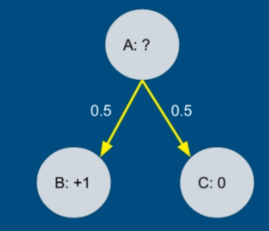

#### Scenario 2

- 1 possible next states from: A:B
- 100% possibility of ending up in B
- Reasonable value for A?
- Value (A) :$A = (1 \times 1) = 1$
- Value tells us the "future goodness" of a state

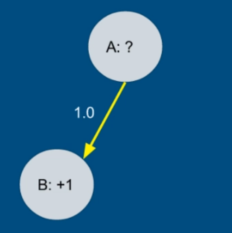

##### Value Function
- $V(S)$ - the value (taking into account the probability of all future rewards) of a state
- Not a fan of this name - "value" is ambiguous term but it's part of RL nomenclature (jargon).

#### Reward Vs. Values
- Value is a measure of possible future rewards we may get from being in this state.
- **Reward is immedate**.

Let's take the example of a game of supermario. 

- Ex. jumping on a Goomba will immediately increases your score.
- Ex. standing in front  of a Goomba will not increase your score, but will put you in a position to jump in the next few states.
- Standing somewhere not near the Goomba will not give us a chance to jump on it.
- We therefore choose actions based on values of states
- Not on the reward we would get by going to a state
- Reward is the **main goal**, but we can't use only the reward to guide actions because they don't tell us about future rewards.

#### Efficiency

<span style='color:blue'> 
  The thing about the value function is  that it is a fast and efficient way to think about how good it is to be in a state without needing to search the rest of the game tree.
</span>

<span style='color:blue'> 
  You could try to enumerate every possible state transition in the game and determine all state transition probabilities. Hoever that would be a time consumming task and inefficient (computationally infeasable for most games).
</span>

<span style='color:blue'> 
 Exponential growth is never good. Searching the state space is only possible in the simplest of functions hence a value function that can tell you how good you will do in the future given your current state is extremely helpful.
</span>

<span style='color:blue'> 
  Tic Tac Toe only has $3^{9} = 19683$  as the board is a 3 by 3 board but this grows exponentially with the size of the baord. For example say you have a 4 by 4 board as in connect 4
</span>
- The value function is a fast $\&$ efficient way of searching the game tree
- Time consuming to enumerate every possible state transition and their probabilities of occuring
- Tic-Tac-Toe 3^(3 $\times$ 3) = 19683
- Connect 4: 3^(4 $\times$ 4) = 43 million

 $$(\# \text{of states each location can take on})^{\#\text{ Rows } \times\text{ } \# \text{ Columns  }}$$ 

- Exponential growth is never good!
- Curse of dimensionality
- $V(s)$ gives answers instantly! $O(1)$
- If we can find it

<span style='color:blue'> 
  If we can find the value function it should be able to this instantly, without creating entire models of the game tree and transition probabilities. In fact this is a constant time lookup since a state directly maps to a value. You would presumably store the values in an array which has a constant time lookup.
</span>

<span style='color:blue'> 
This problem is another instance of the curse of dimensionality.
</span>
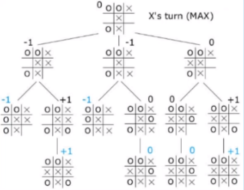



#### Value Functions in RL
- Estimating the value function is a central task in RL
- **Note: Not all RL stategies require it.**
- Example: Evolutionary algorithm that mutates $\&$ spawns offspring, only those who survive the longest make it to next generation.
- By pure evolution + natural selection we can breed better and better agents
- But not the type of algorithm we are intrested in for RL most of the time

<span style='color:blue'> 
For instance , a genetic algorithm simply spawns offspring that have random genetic mutations and the ones who survives the longest will go on to spawn offspring in the next generation. So by pure evolution or natural selection we can breed algorithms that get iteratively better at the game. This is not however the algorithm that we are intrested in, in RL most of the time.
<\span>
    
#### A little math
- $V(s) = E[\text{all future reward}| S(t) = s]$ 
- $E[X]= $ average of $X$

<span style='color:blue'> 
The value function $V(s)$ takes on one argument which is the state, it is the expected value of all future rewards, given that the current state is $X$. 
    </span>

#### Finding $V(s)$

<span style='color:blue'> 
We are going to introduce some unrealistic constraints so that the problem can actually be solved. But you'll see in the later sections that we won't need to do this. The algorithm we will use is an iterative one, meaning we'll run a loop and each time we go through the loop we get closer and closer to the true value function.
    </span>
    
- We'll introduce a generic algorithm here
- You'll need the "full" version later , so we need to introduce some constraints here
- Iterative algorithm
- Initialize $V(s)$:
    -  $V(s)=1 $ if $s= $ winning state
    -  $V(s)=0 $ if $s= $ lose or draw
    -  $V(s)=0.5$ otherwise
- When we study the "real" algorithms, we won't need such careful initialization
- $V(s) $ can be interpreted as probability of winning after arriving in $s$ (for this game only). 

<span style='color:blue'> 
One way you can interpret the value function in this case but not in general is that it is the probability of winning. The value is always going to be between 0 and 1 so this makes sence here.
    </span>
    
 #### Finding $V(s)$  
- After we initialize $V(s)$, we update it as follows
$$V(s) \leftarrow V(s)+ \alpha (V(s^{'}) - V(s) ) $$
- Looks simple but some hidden details
- $s =$ current state, $s^{'} =$ next state
- $s$ represents every state we encounter in an episode
- Means we need to actually play an an epiosode and keep track of state history
- Terminal state never updated since it doesn't have a next state
- We'll do this over many episodes
    
<span style='color:blue'> 
The update equation looks simple but has many hidden meanings. It kind of looks like gradient descent. We take the value function at a state$V(s)$ and we update it by adding the learning rate ($\alpha$) times $(V(s^{'}) - V(s) )$, where $V(s^{'})$ is the next state and $V(s)$ is the current state.
    </span>

<span style='color:blue'> 
The update equation looks simple but has many hidden meanings. It kind of looks like gradient descent. We take the value function at a state$V(s)$ and we update it by adding the learning rate ($\alpha$) times $(V(s^{'}) - V(s) )$, where $V(s^{'})$ is the next state and $V(s)$ is the current state.
    </span>
    
<span style='color:blue'> 
 The first detail here is that $s$ here represents all states that we encountered in an episode (remember in Tic Tac Toe an episode is a single full game). So that means for each iteration of the loop we actually need to play the game and remember all the states we where in. 
 </span>

<span style='color:blue'> 
We then loop through each of the states in the state history and update the value using this equation. 
 </span>
    
<span style='color:blue'> 
Notice that the value of the terminal state will never get updated because this equation updates a states value based on the next state, which does not exist in the case of a terminal state. i.e. in the case of a teminal state $V(s) \leftarrow V(s)+ \alpha (V(s) - V(s) ) $ and since $V(s) - V(s)  = 0$ when refering to the terminal state $V(s) \leftarrow V(s) + 0 $. In other words if state $s$ is terminal then $s^{'}$ does not exist.
 </span>

#### Pseudocode

In Pseudocode it might look something like this:

<span style='color:blue'> 
We loop through the maximum number of iterations (max_iterations) . We play the game. We get the the state history from the game and we loop through the state history and we run through the update equation.
 </span>
 
 #### Playing the game
 
 <span style='color:blue'> 
The next next detail we need to talk about is how we actually play the game. Are we just going to take random actions?
 </span>
 
  <span style='color:blue'> 
No, In this case we would not need to because  we have a value function. A value function tells us how good a state is based on how good the future states will be. So all we have to do is perform an action that leads to the best next state. This is shown in pseudo code below:
 </span>
 
  <span style='color:red'> 
Would taking random actions even give us the right value function? No! Because a game tree with random actions has different probabilities than a game tree with "best" (optimal) actions.
 </span>
 
 - How do we actually play the game/ generate an episode?
 - Take random actions? No!
 - We don't need to, we have the value function
 

<span style='color:blue'> 
We loop through all the possible actions that will take us to all the possible next states and we look at the $V(s')$.  If $V(s')$ is greater than the maximum value $V$ we have seen so far , we save it and we save that action.
 </span>


<span style='color:blue'> 
What is the problem with this strategy?
 </span>
 
 #### Problem?
 - Problem with previous approach: Value function is not accurate!
 - If we had the  true value function, we would't need to do any of this work
 - Example of the explore-exploit dilemma
 - Random actions lead us to states that we may not have otherwise visited
 - We can thus improve our value estimate for those states
 - But to win, we need to do the action that yields maximum value
 - We will use epsilon-greedy
 
 
<span style='color:blue'> 
If we already had an accurate value function we would not need to do any of this work in the first place (The value function is an inaccurate estimate for the true population parameter). You might recognize this problem as a problem we have already talked about. It is the explore exploit dilemma. In particular by taking random actions we can learn about new states that we would have otherwise never gone to. By doing so we can improve our estimate of the value function for those states. But in order to win we need to do the action that yields the maximum value. So we will be using the epsilon greedy strategy to make a tradeoff between the exploation and exploitation.
 </span>

#### Intuition (Why the algorithm works)
- Should remind you of the low-pass filter / average-value-finding equation we saw earlier ($+$ gradient descent if you have seen that)
- Since we visit the states stochastically, $V(s)$ will try to get close to $V(s')$ for all possible next $s^{'}$
- By playing infinitely many episodes, the proportion of time we spend in eachc s$^{'}$ will approach the true probabilities (see convergence).

$$V(s) \leftarrow V(s)+ \alpha (V(s^{'}) - V(s) ) $$

<span style='color:blue'> 
Let's look at some intuition for why this iterative update works for us. It should remind you of the [low pass filter](https://www.electronics-tutorials.ws/filter/filter_2.html) and the iterative average finding equation seen earlier (A low pass filter (LPF) is an idea from circuitry, it is  a filter that passes signals with a frequency lower than a selected cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency. What in statistics/mathamatics we would think of as a ceiling).
 </span>
 
 <span style='color:blue'> 
It should also look like gradient descent. $V(s^{'})$ is the target value and we want to move $V(s)$ towards that value. However with reinforcement learning there are multiple possible next states. So there are multiple $s^{'}$'s (multiple s primes). So by pulling this update equation multiple times we're pulling V(s) in multiple different directions all at once.
 </span>
 
  <span style='color:blue'> 
The idea is that by playing infinitely many episodes the proportion of time we spend in $s^{'}$ will approach the true next state probabilities.
 </span>

#### Order is important

  <span style='color:blue'> 
One extremely important detail that's also extremely difficult to discern  given only the update formula is the order in which you have to update the values for any given state.
</span>

- Extremely important detail, hard to discern from update equation alone
- What order to update $V(s)$?
- Key: We are moving $V(s)$ closer to $V(s^{'})$
